## 참고: https://hleecaster.com/ml-linear-regression-example/

## 라이브러리 설치, 호출

!pip3 install -U scikit-learn<br>
!pip3 install pandas<br>
!pip3 install numpy<br>
!pip3 install matplotlib<br>
!pip3 install statsmodels<br>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

## 데이터 다운로드 (특별할인 판매)

In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/jmnote/zdata/master/logistic-regression/special-sales.csv')
print(df.head())
print(df.shape)

         date weekday  busy_day  high_temperature  special_sales
0  2002-08-05     Mon         0                28              1
1  2002-08-06     Tue         0                24              0
2  2002-08-07     Wed         1                26              0
3  2002-08-08     Thu         0                24              0
4  2002-08-09     Fri         0                23              0
(21, 5)


## Input, Feature 설정

In [3]:
Label = df['special_sales']
InputFeature = df[['busy_day','high_temperature']]

## Keras Logit 모델 fitting

In [4]:
model = Sequential()
model.add(Dense(3, activation='linear', input_shape=(2,)))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.01))
# multi-classification => categorical_crossentropy를 써야함

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 9         
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


## Keras 모델 살펴보기

In [6]:
model.fit(x=InputFeature, y=Label, epochs=100, shuffle=True, batch_size=3)

Epoch 1/100
7/7 [==============================] - 0s 1ms/step - loss: 2.3413
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 0.8209
Epoch 3/100
7/7 [==============================] - 0s 1ms/step - loss: 0.9741
Epoch 4/100
7/7 [==============================] - 0s 1ms/step - loss: 0.7584
Epoch 5/100
7/7 [==============================] - 0s 1ms/step - loss: 0.7287
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 0.7048
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6883
Epoch 8/100
7/7 [==============================] - 0s 1ms/step - loss: 0.6813
Epoch 9/100
7/7 [==============================] - 0s 1ms/step - loss: 0.6532
Epoch 10/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6558
Epoch 11/100
7/7 [==============================] - 0s 1ms/step - loss: 0.6676
Epoch 12/100
7/7 [==============================] - 0s 1ms/step - loss: 0.6743
Epoch 13/100
7/7 [==============================] - 0s 1ms/st

In [7]:
model.predict(InputFeature)

array([[0.13844463],
       [0.14920992],
       [0.5728568 ],
       [0.14920992],
       [0.1520069 ],
       [0.5621237 ],
       [0.5835212 ],
       [0.1437433 ],
       [0.1464557 ],
       [0.5621237 ],
       [0.15772977],
       [0.15484682],
       [0.56749827],
       [0.5728568 ],
       [0.1437433 ],
       [0.15772977],
       [0.59936976],
       [0.14107308],
       [0.1520069 ],
       [0.5941082 ],
       [0.5835212 ]], dtype=float32)

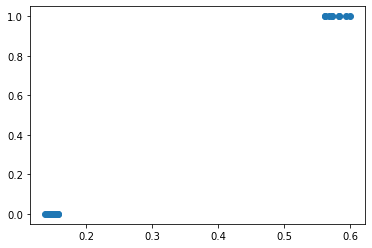

In [8]:
plt.plot(model.predict(InputFeature), df['busy_day'], 'o')
plt.show()

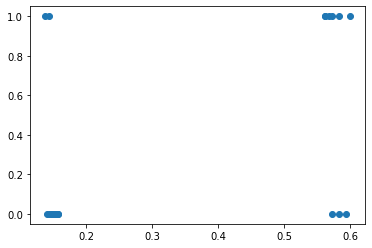

In [9]:
plt.plot(model.predict(InputFeature), df['special_sales'], 'o')
plt.show()

In [10]:
model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.001))
model.fit(x=InputFeature, y=Label, epochs=300, shuffle=True)

Epoch 1/300
1/1 [==============================] - 0s 279ms/step - loss: 0.5477
Epoch 2/300
1/1 [==============================] - 0s 3ms/step - loss: 0.5423
Epoch 3/300
1/1 [==============================] - 0s 3ms/step - loss: 0.5385
Epoch 4/300
1/1 [==============================] - 0s 3ms/step - loss: 0.5363
Epoch 5/300
1/1 [==============================] - 0s 5ms/step - loss: 0.5356
Epoch 6/300
1/1 [==============================] - 0s 3ms/step - loss: 0.5359
Epoch 7/300
1/1 [==============================] - 0s 4ms/step - loss: 0.5367
Epoch 8/300
1/1 [==============================] - 0s 3ms/step - loss: 0.5375
Epoch 9/300
1/1 [==============================] - 0s 3ms/step - loss: 0.5380
Epoch 10/300
1/1 [==============================] - 0s 3ms/step - loss: 0.5379
Epoch 11/300
1/1 [==============================] - 0s 3ms/step - loss: 0.5375
Epoch 12/300
1/1 [==============================] - 0s 2ms/step - loss: 0.5369
Epoch 13/300
1/1 [==============================] - 0s 4ms/

1/1 [==============================] - 0s 3ms/step - loss: 0.5319
Epoch 105/300
1/1 [==============================] - 0s 3ms/step - loss: 0.5318
Epoch 106/300
1/1 [==============================] - 0s 3ms/step - loss: 0.5318
Epoch 107/300
1/1 [==============================] - 0s 3ms/step - loss: 0.5318
Epoch 108/300
1/1 [==============================] - 0s 3ms/step - loss: 0.5317
Epoch 109/300
1/1 [==============================] - 0s 3ms/step - loss: 0.5317
Epoch 110/300
1/1 [==============================] - 0s 4ms/step - loss: 0.5316
Epoch 111/300
1/1 [==============================] - 0s 6ms/step - loss: 0.5316
Epoch 112/300
1/1 [==============================] - 0s 5ms/step - loss: 0.5315
Epoch 113/300
1/1 [==============================] - 0s 5ms/step - loss: 0.5315
Epoch 114/300
1/1 [==============================] - 0s 6ms/step - loss: 0.5314
Epoch 115/300
1/1 [==============================] - 0s 4ms/step - loss: 0.5314
Epoch 116/300
1/1 [==============================] - 0

1/1 [==============================] - 0s 6ms/step - loss: 0.5271
Epoch 207/300
1/1 [==============================] - 0s 4ms/step - loss: 0.5271
Epoch 208/300
1/1 [==============================] - 0s 3ms/step - loss: 0.5270
Epoch 209/300
1/1 [==============================] - 0s 4ms/step - loss: 0.5270
Epoch 210/300
1/1 [==============================] - 0s 4ms/step - loss: 0.5269
Epoch 211/300
1/1 [==============================] - 0s 3ms/step - loss: 0.5269
Epoch 212/300
1/1 [==============================] - 0s 4ms/step - loss: 0.5268
Epoch 213/300
1/1 [==============================] - 0s 3ms/step - loss: 0.5268
Epoch 214/300
1/1 [==============================] - 0s 3ms/step - loss: 0.5267
Epoch 215/300
1/1 [==============================] - 0s 2ms/step - loss: 0.5267
Epoch 216/300
1/1 [==============================] - 0s 3ms/step - loss: 0.5266
Epoch 217/300
1/1 [==============================] - 0s 3ms/step - loss: 0.5266
Epoch 218/300
1/1 [==============================] - 0

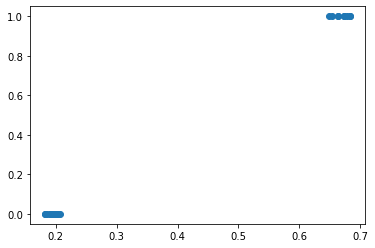

In [11]:
plt.plot(model.predict(InputFeature), df['busy_day'], 'o')
plt.show()

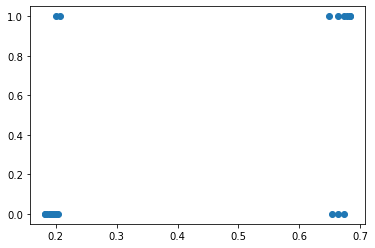

In [12]:
plt.plot(model.predict(InputFeature), df['special_sales'], 'o')
plt.show()

In [13]:
import scikitplot as skplt
from sklearn.metrics import roc_auc_score

In [14]:
print(roc_auc_score(Label, model.predict(InputFeature)))

0.8798076923076923


In [15]:
from sklearn import metrics
# ROC curve 시각화
Labels = Label
pred = model.predict(InputFeature)
fpr, tpr, _ = metrics.roc_curve(Label,  pred)

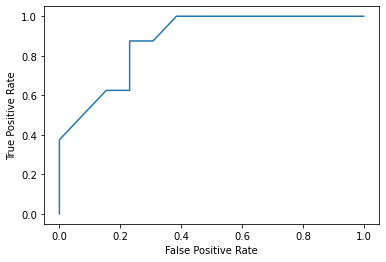

In [16]:
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()